<a href="https://colab.research.google.com/github/Krishnaa-tech/Deep-Learning/blob/main/CNN_CIA-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

># <center> <u>**DEEP LEARNING CIA - 3**</u>
***KRISH GOYAL | 21112015*** <br>
***JOAN JOB    | 21112037***

>### <center> ***Original CNN Code***
**Code BY: KRISH GOYAL**

#### Code to delete the  _`Logs`_ directory

In [1]:
import shutil

# Function to delete the "logs" directory
def delete_logs_directory():
    try:
        shutil.rmtree("logs")
        print("The 'logs' directory has been deleted.")
    except FileNotFoundError:
        print("The 'logs' directory does not exist.")

# Call the function to delete the "logs" directory
delete_logs_directory()


The 'logs' directory does not exist.


In [2]:
import os
import datetime
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
%load_ext tensorboard

169001437/169001437 [==============================] - 14s 0us/step
Enter the number of epochs: 50
Epoch 1/50
1563/1563 [==============================] - 25s 7ms/step - loss: 4.1539 - accuracy: 0.0541 - val_loss: 3.8058 - val_accuracy: 0.1060
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 3.6782 - accuracy: 0.1223 - val_loss: 3.4029 - val_accuracy: 0.1762
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 3.3938 - accuracy: 0.1750 - val_loss: 3.1689 - val_accuracy: 0.2251
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 3.1989 - accuracy: 0.2114 - val_loss: 2.9994 - val_accuracy: 0.2584
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.0632 - accuracy: 0.2369 - val_loss: 2.8445 - val_accuracy: 0.2848
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.9655 - accuracy: 0.2566 - val_loss: 2.7015 - val_accuracy: 0.3154
Epoch 7/50
1563/1563 [=========

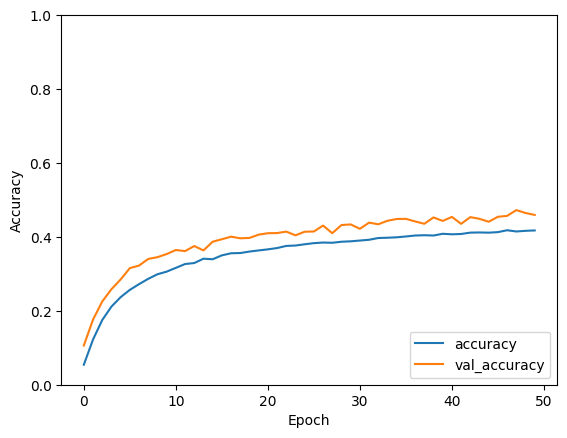

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

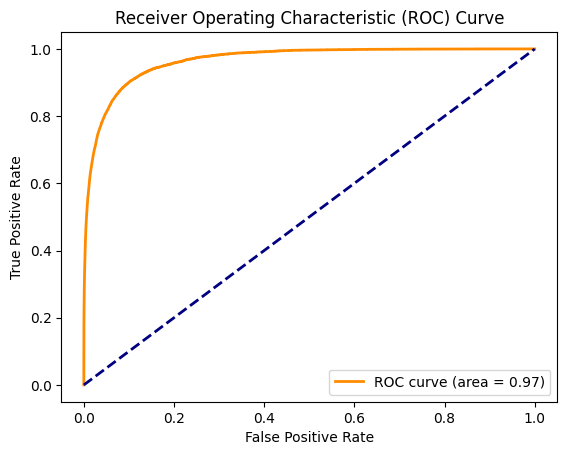

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[78  1  3 ...  0  0  0]
 [ 0 66  0 ...  0  0  1]
 [ 0  3 34 ...  0  2  0]
 ...
 [ 0  1  0 ... 37  0  0]
 [ 1  0  6 ...  3 19  0]
 [ 1  0  1 ...  0  0 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.78      0.69       100
           1       0.43      0.66      0.52       100
           2       0.38      0.34      0.36       100
           3       0.27      0.23      0.25       100
           4       0.26      0.25      0.25       100
           5       0.46      0.43      0.45       100
           6       0.60      0.46      0.52       100
           7       0.55      0.41      0.47       100
           8       0.62      0.59      0.61       100
           9       0.78      0.42      0.55       100
          10       0.27      0.31      0.29       100
          11       0.55      0.27      0.36       100
          12       0.56      0.44      0.49 

In [3]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='optimize_plot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

>##### **Observation :**
-

>## <center> <u>**Changes made by KRISH**</u>
- Removed all the Dropout Layers.
- Changed the Optimizer from `Adam` to `SGD`.
- Changed the Optimizer from `Adam` to `RMSprop`.
- Changing the `kernel size`, `Learning Rate` & removing `Padding` in all the code.
- Changed the model loss function from `categorical_crossentropy` to `SparseCategoricalCrossentropy`.

***Some issues which were faced during walkthrough***  <br>
- `.squeeze()` due to the <br>*[[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_85879]*

### 1st Instance Change:  <br>
  - **Removed all the Dropout Layers.**<br>

Enter the number of epochs: 50
Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 4.0626 - accuracy: 0.0660 - val_loss: 3.6660 - val_accuracy: 0.1209
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.5393 - accuracy: 0.1438 - val_loss: 3.2914 - val_accuracy: 0.1951
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.2213 - accuracy: 0.2075 - val_loss: 3.0159 - val_accuracy: 0.2541
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.9837 - accuracy: 0.2499 - val_loss: 2.7792 - val_accuracy: 0.3003
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.8241 - accuracy: 0.2815 - val_loss: 2.6763 - val_accuracy: 0.3242
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.7056 - accuracy: 0.3094 - val_loss: 2.6009 - val_accuracy: 0.3371
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.5955 - accuracy: 0.330

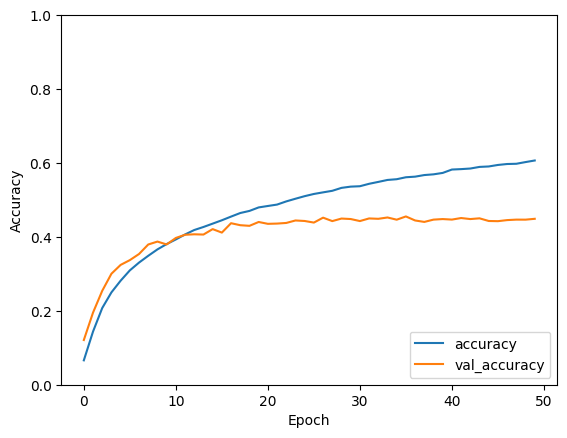

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

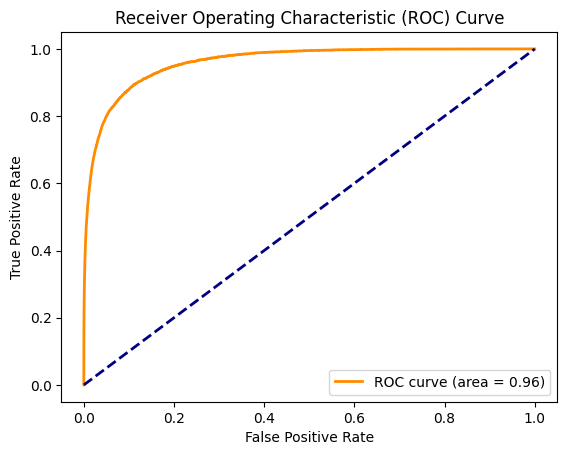

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[76  1  1 ...  0  0  0]
 [ 1 52  0 ...  1  0  0]
 [ 0  0 41 ...  0  3  0]
 ...
 [ 0  0  1 ... 24  0  0]
 [ 1  0  6 ...  0 16  0]
 [ 0  0  0 ...  0  0 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       100
           1       0.46      0.52      0.49       100
           2       0.34      0.41      0.37       100
           3       0.32      0.30      0.31       100
           4       0.20      0.31      0.25       100
           5       0.34      0.52      0.41       100
           6       0.57      0.43      0.49       100
           7       0.59      0.44      0.50       100
           8       0.41      0.56      0.47       100
           9       0.49      0.57      0.53       100
          10       0.31      0.30      0.31       100
          11       0.31      0.36      0.33       100
          12       0.45      0.49      0.47 

In [4]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='Dropoutlayerplot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

>##### **Observation :**
-

### 2nd Instance Change:  <br>
  - **Optimizer Changed from `Adam` to `SGD`.**<br>

Enter the number of epochs: 50
Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 4.6082 - accuracy: 0.0098 - val_loss: 4.6053 - val_accuracy: 0.0097
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 4.6063 - accuracy: 0.0102 - val_loss: 4.6048 - val_accuracy: 0.0108
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 4.6057 - accuracy: 0.0101 - val_loss: 4.6045 - val_accuracy: 0.0107
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 4.6049 - accuracy: 0.0106 - val_loss: 4.6042 - val_accuracy: 0.0121
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 4.6046 - accuracy: 0.0104 - val_loss: 4.6040 - val_accuracy: 0.0145
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 4.6039 - accuracy: 0.0109 - val_loss: 4.6037 - val_accuracy: 0.0160
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 4.6034 - accuracy: 0.01

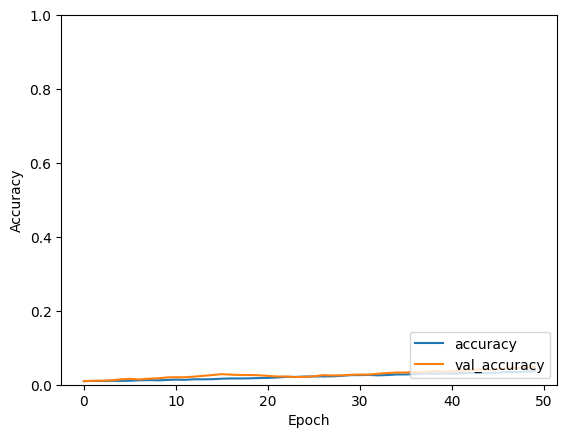

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 64)         

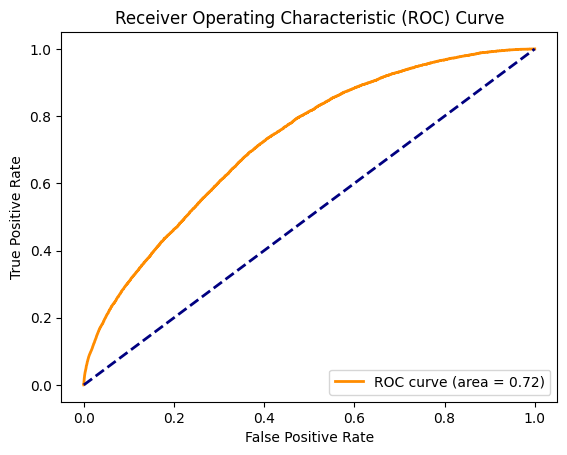

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[14  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 7  1  1 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 6  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.14      0.09       100
           1       0.00      0.00      0.00       100
           2       0.50      0.01      0.02       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.02      0.08      0.03 

In [5]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.SGD(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='optmizer_change1.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

>##### **Observation :**
-

### 2nd Instance Change:  <br>
  - **Optimizer Changed from `Adam` to `RMSprop`.**<br>

Enter the number of epochs: 50
Epoch 1/50
1563/1563 [==============================] - 12s 6ms/step - loss: 4.1724 - accuracy: 0.0548 - val_loss: 3.8448 - val_accuracy: 0.0968
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.7387 - accuracy: 0.1162 - val_loss: 3.5428 - val_accuracy: 0.1524
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 3.5113 - accuracy: 0.1563 - val_loss: 3.4603 - val_accuracy: 0.1730
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.3164 - accuracy: 0.1948 - val_loss: 3.1489 - val_accuracy: 0.2227
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 3.1640 - accuracy: 0.2228 - val_loss: 3.1731 - val_accuracy: 0.2313
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 3.0633 - accuracy: 0.2432 - val_loss: 2.8812 - val_accuracy: 0.2874
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.9841 - accuracy: 0.25

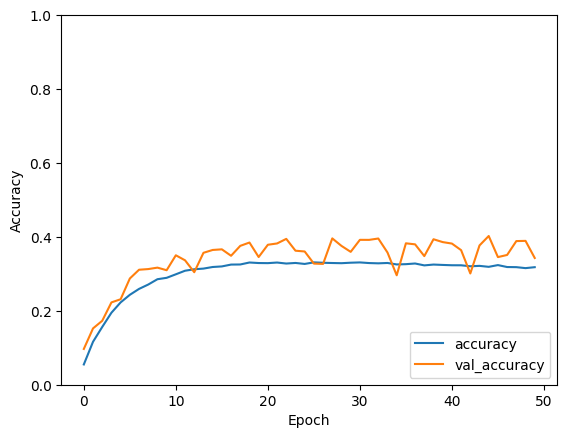

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 64)         

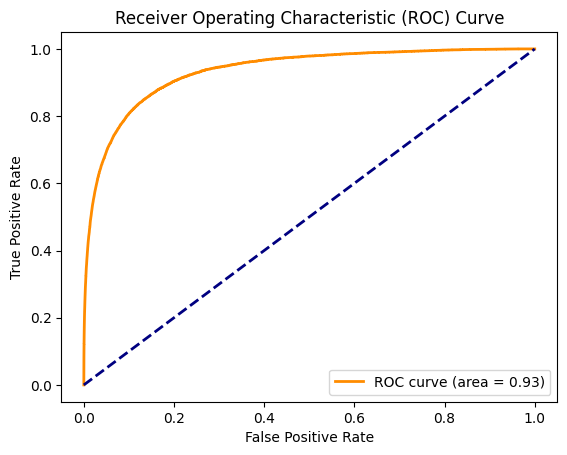

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[60  4  2 ...  0  0  0]
 [ 0 57  0 ...  1  0  0]
 [ 0  2 40 ...  1  4  0]
 ...
 [ 0  1  0 ... 36  0  0]
 [ 0  2 18 ...  2  7  1]
 [ 1  2  0 ...  1  0 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67       100
           1       0.25      0.57      0.35       100
           2       0.23      0.40      0.29       100
           3       0.19      0.19      0.19       100
           4       0.12      0.07      0.09       100
           5       0.39      0.19      0.26       100
           6       0.32      0.34      0.33       100
           7       0.39      0.30      0.34       100
           8       0.56      0.55      0.55       100
           9       0.88      0.22      0.35       100
          10       0.26      0.28      0.27       100
          11       0.30      0.13      0.18       100
          12       0.68      0.19      0.30 

In [6]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='optmizer_change2.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

### 3rd Instance Change:  <br>
  - **Changing the kernel size, Learning Rate & Removing Padding in all the code.**<br>

Enter the number of epochs: 50
Epoch 1/50
1563/1563 [==============================] - 13s 7ms/step - loss: 4.6114 - accuracy: 0.0097 - val_loss: 4.6078 - val_accuracy: 0.0100
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 4.6103 - accuracy: 0.0088 - val_loss: 4.6086 - val_accuracy: 0.0100
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 4.6103 - accuracy: 0.0099 - val_loss: 4.6096 - val_accuracy: 0.0100
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 4.6105 - accuracy: 0.0092 - val_loss: 4.6082 - val_accuracy: 0.0100
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 4.6104 - accuracy: 0.0100 - val_loss: 4.6089 - val_accuracy: 0.0100
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 4.6102 - accuracy: 0.0092 - val_loss: 4.6096 - val_accuracy: 0.0100
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 4.6105 - accuracy: 0.00

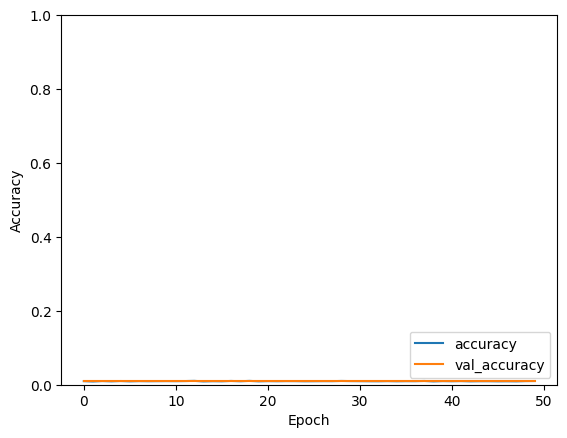

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 6, 6, 64)         

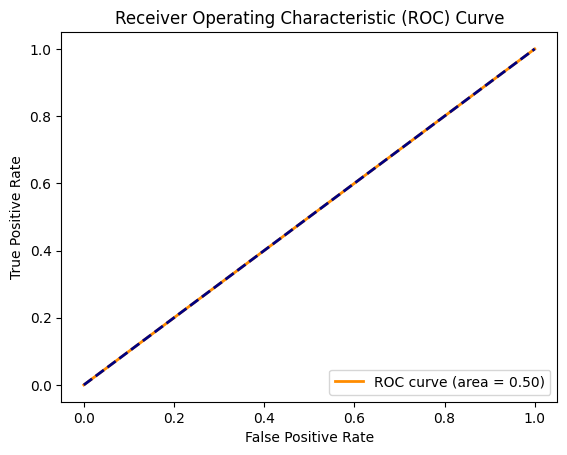

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00   

In [7]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.Adam(0.01)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='kernel_padding_lr_changes.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

>##### **Observation :**
-

>#### ***UNDERSTANDING THE LOGIC BEHIND LOSS FUNCTION***

- `SparseCategoricalCrossentropy`

In [8]:
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# Using 'auto'/'sum_over_batch_size' reduction type.
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.1769392

- `CategoricalCrossentropy`

In [9]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

1.1769392

- `.ravel()` exploration

In [10]:
import numpy as np

# Example arrays
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
arr_flattened = arr_2d.ravel()

print("Original 2D array:")
print(arr_2d)

print("\nFlattened array:")
print(arr_flattened)

Original 2D array:
[[1 2 3]
 [4 5 6]]

Flattened array:
[1 2 3 4 5 6]


In [11]:
# from tensorboard import notebook
# notebook.list()
# notebook.display(port=6006, height=1000)

>## <center> <u>**Changes made by JOAN**</u>
- Removed all the Dropout Layers
- Changed the Optimizer from `Adam` to `SGD`.
-
-

## 1st Initial Change:  <br>
  - **Changed certain layers.**<br>
  - **The layers were changed from `MaxPooling2D()` to `AveragePooling2D()`**<br>
  - **There was also an existing layer of `GlobalAveragePooling2D()`**

Enter the number of epochs: 50
Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 4.1819 - accuracy: 0.0494 - val_loss: 3.8885 - val_accuracy: 0.0828
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.7386 - accuracy: 0.1123 - val_loss: 3.4937 - val_accuracy: 0.1567
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.4993 - accuracy: 0.1551 - val_loss: 3.2920 - val_accuracy: 0.1970
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 3.3164 - accuracy: 0.1914 - val_loss: 3.0773 - val_accuracy: 0.2433
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 3.1620 - accuracy: 0.2202 - val_loss: 2.9603 - val_accuracy: 0.2646
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 3.0435 - accuracy: 0.2419 - val_loss: 2.8823 - val_accuracy: 0.2776
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.9434 - accuracy: 0.26

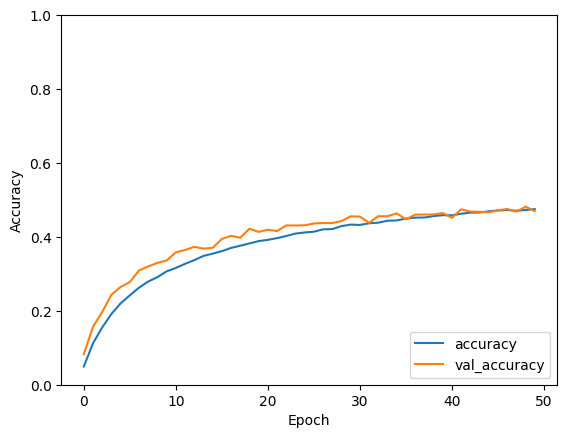

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 average_pooling2d (Average  (None, 16, 16, 32)        0         
 Pooling2D)                                                      
                                                                 
 dropout_17 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 8, 8, 64)          0         
 gePooling2D)                                                    
                                                                 
 dropout_18 (Dropout)        (None, 8, 8, 64)         

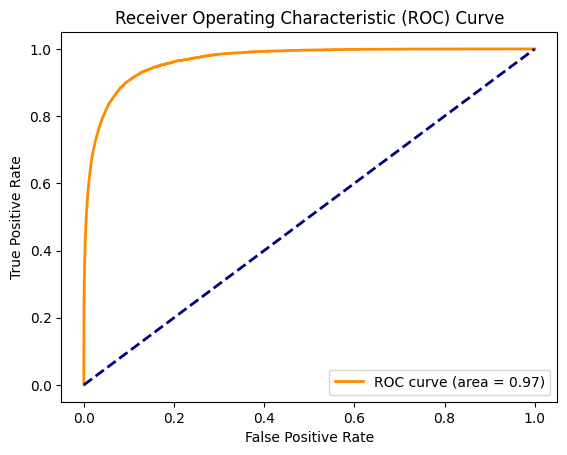

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[76  1  1 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 38 ...  0  5  0]
 ...
 [ 0  0  0 ... 51  1  0]
 [ 1  1  8 ...  2 21  0]
 [ 0  2  0 ...  0  0 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       100
           1       0.48      0.64      0.55       100
           2       0.33      0.38      0.35       100
           3       0.42      0.17      0.24       100
           4       0.19      0.31      0.23       100
           5       0.50      0.38      0.43       100
           6       0.65      0.47      0.55       100
           7       0.43      0.54      0.48       100
           8       0.59      0.52      0.55       100
           9       0.61      0.57      0.59       100
          10       0.34      0.32      0.33       100
          11       0.47      0.25      0.33       100
          12       0.67      0.40      0.50 

In [12]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    # model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

>##### **Observation :**
-

## 2nd Instance Change:  <br>
  - **Changed the optimizers from ADAM to SGD.**<br>
  - **Also changed the loss function from categorical cross entropy to sparse categorical cross entropy**<br>
  - **Changed activation functions of certain layers from relu to sigmoid or tanh.**

In [13]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='sigmoid', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='sigmoid'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='tanh'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.SGD(0.001, momentum = 0.9)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

Enter the number of epochs: 50
Epoch 1/50


InvalidArgumentError: ignored

>##### **Observation :**
-

## 3rd Instance Change:  <br>
  - **Eliminated certain Layers and Dropout Layers.**<br>

Enter the number of epochs: 50
Epoch 1/50
1563/1563 [==============================] - 22s 7ms/step - loss: 4.0059 - accuracy: 0.0773 - val_loss: 3.6317 - val_accuracy: 0.1438
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.4265 - accuracy: 0.1681 - val_loss: 3.1361 - val_accuracy: 0.2284
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 3.0879 - accuracy: 0.2353 - val_loss: 2.8570 - val_accuracy: 0.2847
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.8464 - accuracy: 0.2775 - val_loss: 2.6351 - val_accuracy: 0.3239
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 2.6745 - accuracy: 0.3116 - val_loss: 2.5159 - val_accuracy: 0.3581
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.5316 - accuracy: 0.3403 - val_loss: 2.4211 - val_accuracy: 0.3681
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.4214 - accuracy: 0.3617

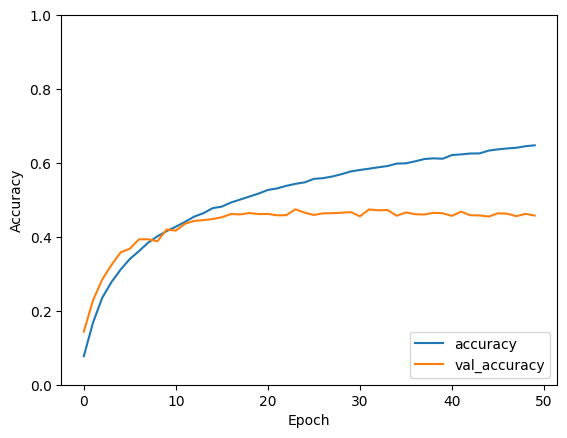

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

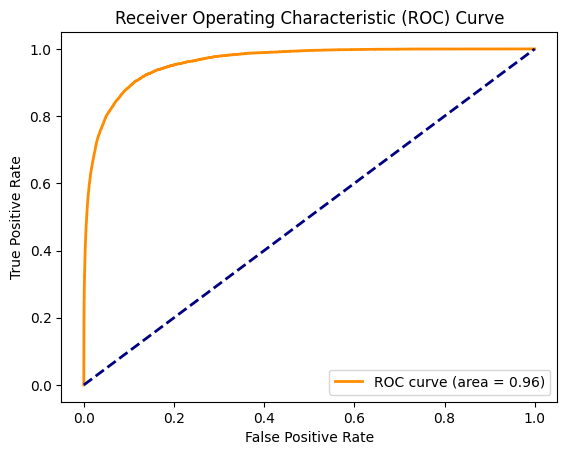

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[76  3  0 ...  0  0  0]
 [ 0 53  0 ...  1  0  0]
 [ 1  1 30 ...  0  9  0]
 ...
 [ 0  0  0 ... 53  0  0]
 [ 1  2  4 ...  0 24  0]
 [ 1  0  0 ...  0  0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       100
           1       0.49      0.53      0.51       100
           2       0.35      0.30      0.32       100
           3       0.28      0.16      0.20       100
           4       0.24      0.29      0.26       100
           5       0.38      0.45      0.41       100
           6       0.59      0.53      0.56       100
           7       0.71      0.48      0.57       100
           8       0.57      0.58      0.58       100
           9       0.60      0.54      0.57       100
          10       0.32      0.32      0.32       100
          11       0.29      0.33      0.31       100
          12       0.40      0.57      0.47 

In [3]:
def load_cifar100():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
    x_train, x_test = x_train / 255.0, x_test / 255.0
    num_classes = 100
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='tanh', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(layers.Dropout(0.25))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

    return model, tensorboard_callback

def train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])
    # model.save_weights("model_weights.h5")
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    return test_acc

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

def plot_model_architecture(model):
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

def plot_roc_curve(model, x_test, y_test):
    y_pred = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

def display_confusion_matrix_and_report(model, x_test, y_test):
    y_pred_probabilities = model.predict(x_test)
    y_pred_class = y_pred_probabilities.argmax(axis=1)
    y_true_class = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_class, y_pred_class)
    class_report = classification_report(y_true_class, y_pred_class)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

def main():
    x_train, y_train, x_test, y_test = load_cifar100()
    input_shape = x_train.shape[1:]
    num_classes = 100

    model, tensorboard_callback = create_cnn_model(input_shape, num_classes)

    epochs = int(input("Enter the number of epochs: "))
    x_val, y_val = x_test, y_test  # Use test set for validation
    history = train_model(model, x_train, y_train, x_val, y_val, epochs, tensorboard_callback)

    evaluate_model(model, x_test, y_test)
    plot_training_history(history)
    plot_model_architecture(model)
    plot_roc_curve(model, x_test, y_test)
    display_confusion_matrix_and_report(model, x_test, y_test)

if __name__ == "__main__":
    main()

>##### **Observation :**
-